# Statistics 2 - Project - Assignment #1

#### Jeremy (931215248) and Uri (300691367)
---


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

plt.style.use('ggplot')

In [ ]:
# load data
# file downloaded from
# https://www.kaggle.com/datasets/khairullahhamsafar/hotels-booking-data-cleaned-version
# and dropped as is in the notebook

df = pd.read_csv("hotel_booking_data_cleaned.csv")

# The Data
The dataset [(link to kaggle page)](https://www.kaggle.com/datasets/khairullahhamsafar/hotels-booking-data-cleaned-version) comprises recorded observations of booking information for two hotels.

We removed columns deemed less relevant, introduced new ones for exploration, and refined the dataset by sampling records from the country ('PRT') and the hotel ('City Hotel') with the highest booking numbers.

#### The new columns we created
1. Sum all guests - adults, children, babies - to one column
2. Sum all stayed nights (weekdays + weekends nights)
3. Generate a binary indicator that equals 1 if the reservation includes weekend nights (Saturday or Sunday).
4. Generate a numeric variable that represents the day of arrival within the range of recorded dates. Set the first recorded day of arrival to 0, and, for instance, a reservation recorded a week later would have the value 7 on that column.
5. Generate 'arrival day of the week' categorical column.
6. Calculate averge cost per guest in reservation

The resulting dataset consists of **20,000** rows with **no missing values**, and includes the following **13 columns**:

| column |type | description |
|-------|-------|----
|is_canceled | binary | was the reservation cancelled|
|lead_time |int |number of days between booking date and arrival date|
|arrival_date_year | int | year of arrival|
|arrival_date_month | category | month of arrival|
|arrival_day_of_week | category | day of arrival (Sun, Mon, etc.)|
|arrival_day | int | number of days between date of arrival to first recorded date of arrival |
|number_of_nights| int| number of nights stayed|
|weekend_included| binary| 1 if reservation include Sat or Sun night|
|is_repeated_guest | binary | 1 if guest stayed in the hotel before|
|deposit_type | category | type of deposit made by the guest
|adr |float | Average Daily Rate, i.e., the average rental income per paid occupied room.
|total_guests | int | number of guests (adults and childern)|
|adr_per_guest | float | adr / total_guests



### Data preprocessing
Below is the code to create the aforementioned features:

In [ ]:
# 1. sum of all guests in reservation
df['total_guests'] = df['adults'] + df['children'] + df['babies']

# 2. sum of all nights in reservation
df['number_of_nights'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

# 3. binary indicator whether a weekend night included in reservation
df['weekend_included'] = df['stays_in_weekend_nights'].map(lambda x: 1 if x > 0 else 0)

# 4. First, concatenate the relevant columns and convert the type to obtain a datetime value.
df['arrival_date'] = df['arrival_date_month'].astype(str) + ' ' + df['arrival_date_day_of_month'].astype(str) + ', ' + df['arrival_date_year'].astype(str)
df['arrival_date'] = df['arrival_date'].apply(lambda x: datetime.strptime(x, "%B %d, %Y"))
# Next, identify day_0 and calculate the new column values based on it.
day_0 = df['arrival_date'].sort_values().values[0]
df['arrival_day'] = df['arrival_date'].map(lambda x: (x - day_0) / np.timedelta64(1, 'D'))

# 5. extract day of the week from the date of arrival
df['arrival_day_of_week'] = df['arrival_date'].map(lambda x: x.strftime('%a'))

# remove rows with 'total_guests' = 0 or 'number_of_nights' = 0 or 'adr' = 0
df = df.loc[(df['total_guests'] > 0) & (df['number_of_nights'] > 0) & (df['adr'] > 0)]

# remove extreme outlier (removing 1 row)
df = df.loc[df['adr'] < 5000] #.reset_index(drop=True)

# 6. create another new column
df['adr_per_guest'] = df['adr'] / df['total_guests']


# narrowing down data

# select only records from top 1 country, and top 1 hotel
df = df.loc[(df['hotel'] == 'City Hotel') & (df['country'] == 'PRT')]

# selecting features
selected_columns = [
    'is_canceled', 'lead_time', 'arrival_date_year',
    'arrival_date_month', 'arrival_day_of_week', 'arrival_day',
    'number_of_nights', 'weekend_included', 'is_repeated_guest',
    'deposit_type', 'adr', 'total_guests', 'adr_per_guest'
    ]
df = df[selected_columns].copy()


# sample 20000 random data points
n = 20000
df = df.sample(n, random_state=27).reset_index(drop=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   is_canceled          20000 non-null  int64  
 1   lead_time            20000 non-null  int64  
 2   arrival_date_year    20000 non-null  int64  
 3   arrival_date_month   20000 non-null  object 
 4   arrival_day_of_week  20000 non-null  object 
 5   arrival_day          20000 non-null  float64
 6   number_of_nights     20000 non-null  int64  
 7   weekend_included     20000 non-null  int64  
 8   is_repeated_guest    20000 non-null  int64  
 9   deposit_type         20000 non-null  object 
 10  adr                  20000 non-null  float64
 11  total_guests         20000 non-null  float64
 12  adr_per_guest        20000 non-null  float64
dtypes: float64(4), int64(6), object(3)
memory usage: 2.0+ MB


## Exploratory Data Analysis

###Distribution of numeric variables

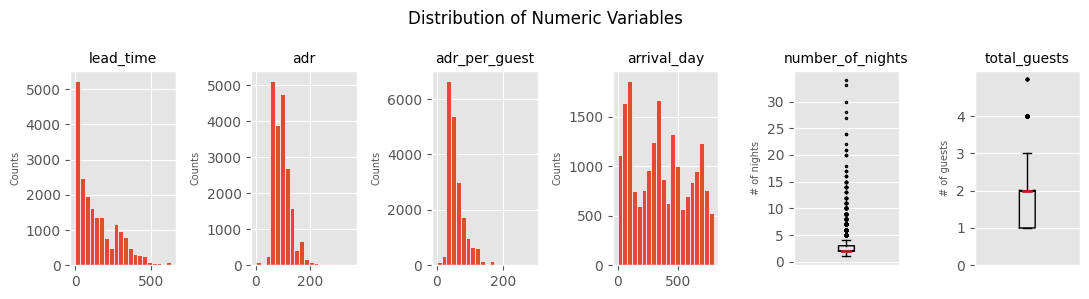



Statistical values:



,lead_time,adr,adr_per_guest,arrival_day,number_of_nights,total_guests
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,140.584650,94.837576,58.040505,360.467200,2.567200,1.80335
std,134.081852,33.549266,28.803998,228.416525,1.554768,0.55398
min,0.000000,1.000000,0.500000,0.000000,1.000000,1.00000
25%,28.000000,67.500000,37.500000,140.000000,2.000000,1.00000
50%,99.000000,90.000000,50.000000,345.000000,2.000000,2.00000
75%,230.000000,110.000000,68.500000,557.000000,3.000000,2.00000
max,629.000000,352.500000,289.880000,792.000000,34.000000,5.00000


In [ ]:
numeric_vars = ['lead_time', 'adr', 'adr_per_guest', 'arrival_day',
                'number_of_nights', 'total_guests']
fig, ax = plt.subplots(1, len(numeric_vars), figsize=(11,3))

for i, p in enumerate(numeric_vars):
  if i > len(numeric_vars) - 3:
    ax[i].boxplot(df[p],notch=True,
                  flierprops={'marker': 'o', 'markersize': 1.5},
                  medianprops={'linewidth': 2, 'color': 'firebrick'})
    ax[i].set_xticks([])
    ax[i].set_yticks(np.arange(0, round(df[p].max(), -1) + 5 , 5 if df[p].max() > 10 else 1))
    ax[i].set_ylabel(f"# of {p.split('_')[-1]}", fontsize=7)
  else:
    ax[i].hist(df[p], edgecolor = "white", bins=20)
    ax[i].set_ylabel("Counts", fontsize=7)
  ax[i].set_title(p, fontsize=10)
fig.suptitle('Distribution of Numeric Variables')
plt.tight_layout()
plt.show()

print("\n")
print("Statistical values:\n")
df[numeric_vars].describe()

**OUTLIERS :**

We can identify an outlier in 'adr' whose value is 1 dollar for the whole booking. We can observe another outlier in 'adr_per_guest' whose value is 0.50 dollar per guest as a result of the same outlier in 'adr' because we defined 'adr_per_guest' as a function of 'adr'.

We can consider the booking whose 'adr_per_guest' value is 289.88 dollar as an outlier as we can clearly see it on the histogram how detached this value is from the density.

### Distribution of categorical and binary varaibles

#### Arrival Date

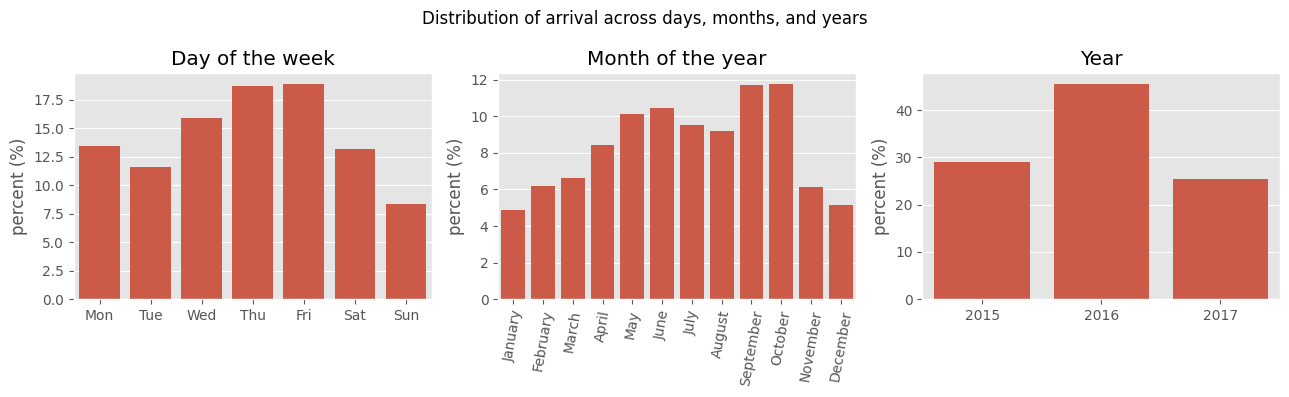

In [ ]:
date_vars = ['arrival_day_of_week', 'arrival_date_month',
             'arrival_date_year']
day_order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December']
year_order = ['2015', '2016', '2017']

fig, ax = plt.subplots(1, 3, figsize=(13,4))

sns.countplot(ax=ax[0], x="arrival_day_of_week", data=df, stat='percent',
              order=day_order)
# ax[0].xaxis.set_tick_params(labelsize=6)
ax[0].set_xlabel("")
ax[0].set_ylabel("percent (%)")
ax[0].set_title("Day of the week")

sns.countplot(ax=ax[1], x="arrival_date_month", data=df, stat='percent',
              order=month_order)
ax[1].xaxis.set_tick_params(labelsize=10, labelrotation=80)
ax[1].set_xlabel("")
ax[1].set_ylabel("percent (%)")
ax[1].set_title("Month of the year")

sns.countplot(ax=ax[2], x="arrival_date_year", data=df, stat='percent',
              order=year_order)
ax[2].set_xlabel("")
ax[2].set_title("Year")
ax[2].set_ylabel("percent (%)")

fig.suptitle("Distribution of arrival across days, months, and years")
plt.tight_layout()
plt.show()

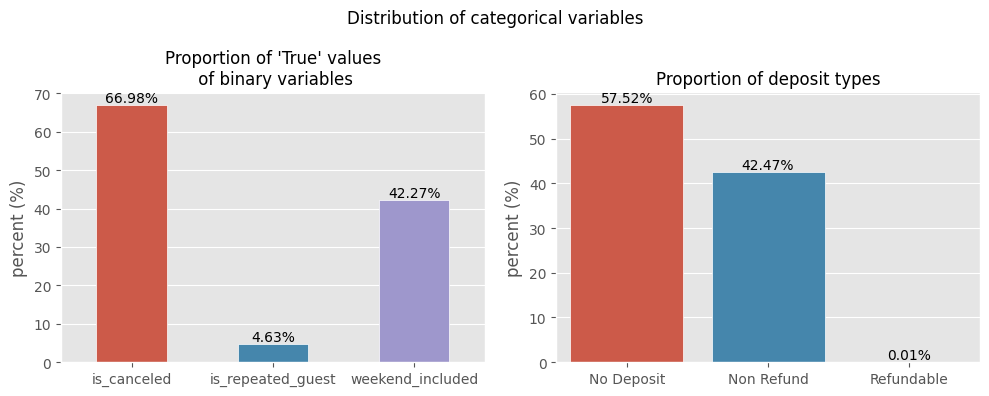

In [ ]:
bin_var = ['is_canceled', 'is_repeated_guest', 'weekend_included']

# calculate percentage of 1's of binary vars
data = df[bin_var].mean() * 100

fig, ax = plt.subplots(1, 2, figsize=(10,4))


a = sns.barplot(x=data.index, y=data.values, width=0.5, edgecolor='white',
                ax=ax[0], hue=data.index)
for i in a.containers:
    a.bar_label(i, fmt='%.2f%%')
ax[0].set_ylabel('percent (%)')
ax[0].set_xlabel("")
ax[0].xaxis.set_tick_params(labelsize=10, labelrotation=0)
ax[0].set_title("Proportion of 'True' values\n of binary variables", fontsize=12)

b = sns.countplot(ax=ax[1], data=df, stat='percent', x='deposit_type',
                  edgecolor='white', hue='deposit_type')
for i in b.containers:
    b.bar_label(i, fmt='%.2f%%')
ax[1].set_ylabel('percent (%)')
ax[1].set_xlabel("")
ax[1].set_title("Proportion of deposit types", fontsize=12)


fig.suptitle("Distribution of categorical variables")
plt.tight_layout()
plt.show()

## Possible Research Questions
1. Does booking in advance (indicated by a high lead_time value) result in a lower average price per night (i.e., a low 'adr' value)?

2. Is there an increased likelihood of reservation cancellation (is_canceled) associated with booking in advance, i.e. are early bookings (higher lead_time) more likely to be canceled?

3. Do guests who return (i.e., with repeated_guest equals 1) tend to pay a lower average nightly rate (i.e., lower 'adr')?

4. Does the average cost per guest ('adr_per_guest') increase over the observed time period (as the 'arrival_day' value rises)?